<a href="https://colab.research.google.com/github/Lyshen/PiggyToy/blob/main/SelfSimpleDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple DNN excercise

## Design an easy and visual implement excercise for kids

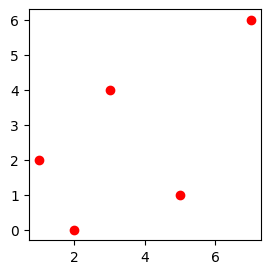

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 3, 5, 7, 2])
y = np.array([2, 4, 1, 6, 0])

plt.figure(figsize=(3,3))
plt.scatter(x, y, marker='o', c='r')
plt.show()

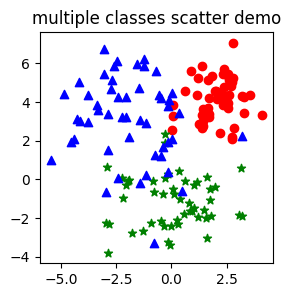

In [ ]:
# Generate serveral normal subsample datasets and scatter them on the figure
size_of_class = 3
size_of_sample = 50
means = [(2,4), (0,-1), (-2,3)]
vars = [[[1,0], [0,1]], [[2,0], [0,2]], [[3,0],[0,3]]]
markers = ['o', '*', '^']
colors = ['r', 'g', 'b']

samples = []
for i in range(size_of_class):
    samples.append(np.random.multivariate_normal(means[i], vars[i], size_of_sample))

plt.figure(figsize=(3,3))
for i in range(size_of_class):
    x, y = samples[i].T
    plt.scatter(x, y, marker=markers[i], c=colors[i])
plt.title('multiple classes scatter demo')
plt.show()

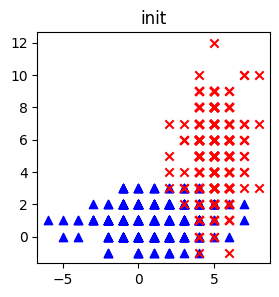

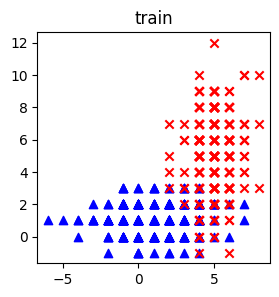

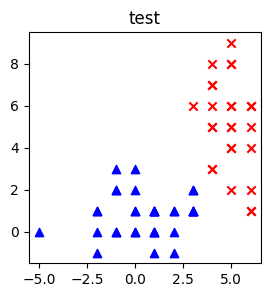

In [ ]:
# Random generation of two kinds of entity and try to split them up into train dataset and test dataset.
def plot_features_and_labels(features, l, markers, colors, title):
    plt.figure(figsize=(3,3))
    for i in range(2):
        x = features[0, np.where(l[i, :] == 1)]
        y = features[1, np.where(l[i, :] == 1)]
        plt.scatter(x, y, marker=markers[i], c=colors[i])
    plt.title(title)
    plt.show()

def split_train_and_test_data(feature_matrix, label_matrix, split_rate = 0.9):
    m = feature_matrix.shape[1]
    indices = np.array(range(m))
    np.random.shuffle(indices)

    split_index = int(m * split_rate)
    train_indices = indices[0:split_index]
    test_indices = indices[split_index:]

    train_features = feature_matrix[:, np.array(train_indices)]
    train_labels = label_matrix[:, np.array(train_indices)]

    test_features = feature_matrix[:, np.array(test_indices)]
    test_labels = label_matrix[:, np.array(test_indices)]

    return train_features, train_labels, test_features, test_labels

size_of_class = 2
size_of_sample = 300
size_of_feature = 2
means = [(1,1), (5,5)]
vars = [[[5, 0], [0,1]], [[1,0], [0,5]]]
markers = ['^', 'x']
colors = ['b', 'r']

features = []
labels = []
for i in range(size_of_class):
    sample = np.round(np.random.multivariate_normal(means[i], vars[i], size_of_sample))
    for j in range(size_of_sample):
        label = np.zeros((size_of_class, 1))
        label[i, 0] = 1
        labels.append(label)
    features.append(sample.T)

features = np.concatenate(features, axis=1)
features.reshape((size_of_feature, size_of_sample * size_of_class))
labels = np.concatenate(labels, axis=1)
labels.reshape((size_of_class, size_of_sample * size_of_class))

train_features, train_labels, test_features, test_labels = split_train_and_test_data(features, labels)

plot_features_and_labels(features, labels, markers, colors, 'init')
plot_features_and_labels(train_features, train_labels, markers, colors, 'train')
plot_features_and_labels(test_features, test_labels, markers, colors, 'test')

In [ ]:
# Implement yourself DNN
sigmod = lambda a: 1.0 / (1.0 + np.exp(-a))

class Neuron:
    def __init__(self, feature_size, active_function=sigmod):
        self.n = feature_size
        #self.W = np.random.rand(self.n + 1, 1) # W[n, 1] 、 bias
        self.W = np.random.uniform(-1., 1., size=(self.n + 1, 1))
        self.learning_rate = 0.01
        self.active_func = active_function

        self.x = None
        self.z = None  # z = W^T * x + bias
        self.H = None  # h = sigmod(z)

    def forward(self, x):
        m = x.shape[1]
        bais = np.ones((1, m))
        self.x = np.concatenate((x, bais), axis=0)
        self.z = self.W.T.dot(self.x)
        self.H = self.active_func(self.z)
        return self.H
    
    def backward(self, dL_by_dH):
        I = np.ones(self.H.shape)
        dH_by_dZ = (I - self.H) * self.H   # deveriate of sigmod function
        dZ_by_dW = self.x

        """
        print('H shape:', self.H.shape)
        print('I shape:', I.shape)
        print('dL/dH :', dL_by_dH.shape)
        print('dH/dz :', dH_by_dZ.shape)
        print('dz/dw :', dZ_by_dW.shape)
        """
        a = dL_by_dH * dH_by_dZ
        a = np.ones((3, 1)).dot(a)
        dL_by_dW = a * dZ_by_dW

        
        m = dL_by_dW.shape[1]
        dL_by_dW = dL_by_dW.dot(np.ones((m, 1)))
        """
        m = dL_by_dW.shape[1]
        indices = np.array(range(m))
        np.random.shuffle(indices)
        split_index = int(m * 0.7)
        save_indices = indices[split_index:]

        sum_vec = np.ones((m, 1))
        sum_vec[save_indices, 0] = 0
        dL_by_dW = dL_by_dW.dot(sum_vec)
        """

        return dL_by_dW

    def predict(self, X):
        m = X.shape[1]
        bias = np.ones((1, m))
        x = np.concatenate((X, bias), axis=0)
        z = self.W.T.dot(x)
        score = self.active_func(z)
        return score

    def update_parameters(self, dL_by_dW):
        self.W = self.W - self.learning_rate * dL_by_dW


binary_classification = lambda a: np.array([a, 1.0 - a])
class OutputLayer:
    def __init__(self, size_of_class):
        self.c = size_of_class
        self.output_func = binary_classification
        self.loss = 0.
        self.dL_by_dH = None
    
    def forward(self, s, Y):
        m = s.shape[1]
        y_hat = self.output_func(s)
        y_hat = y_hat.reshape((self.c, m))
        k = Y - y_hat
        yy = np.ones((1, self.c)).dot((Y - y_hat) * (Y - y_hat))
        self.loss = np.sum(yy)
 
        kk = (y_hat - Y)
        self.dL_by_dH = -1. * kk[0, :] * kk[1, :]
        self.dL_by_dH = self.dL_by_dH.reshape((1, m))
        return y_hat, self.loss

    def backward(self):
        return self.dL_by_dH


def draw_neuron_boundary(neuron, features, labels, markers, colors):
    # Define the grid of points
    grid_step = 0.2
    xx, yy = np.meshgrid(np.arange(-4, 10, grid_step), np.arange(-4, 10, grid_step))
    grid_points = np.c_[xx.ravel(), yy.ravel()].T

    # Predict
    predict = neuron.predict(grid_points)

    # Create the scatter plot with decision boundary
    positive_index = np.where(predict[0,:] > 0.5)
    negative_index = np.where(predict[0,:] <= 0.5)

    plt.figure(figsize=(4, 4))
    plt.scatter(grid_points[0, positive_index], grid_points[1, positive_index], c='b', alpha=0.1)
    plt.scatter(grid_points[0, negative_index], grid_points[1, negative_index], c='y', alpha=0.1)

    for i in range(2):
        x = features[0, np.where(labels[i, :] == 1)]
        y = features[1, np.where(labels[i, :] == 1)]
        plt.scatter(x, y, marker=markers[i], c=colors[i])

    plt.show()

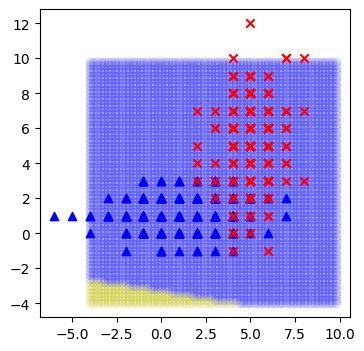

loss : 478.9483610560001


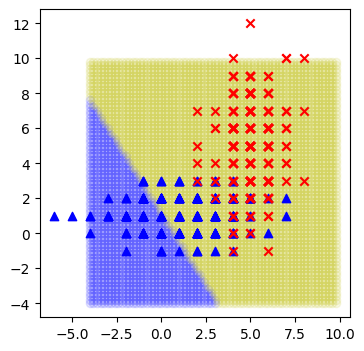

loss : 444.0633227620894


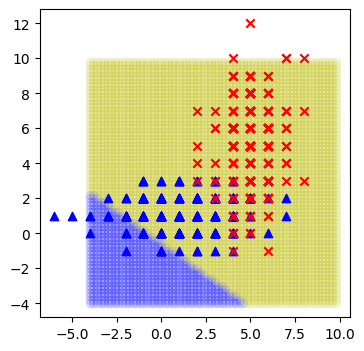

loss : 487.716874732782


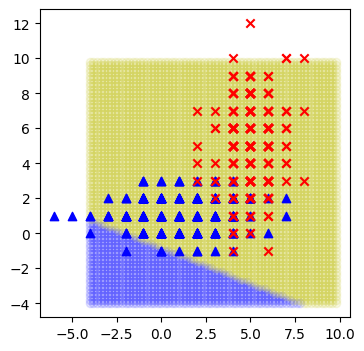

loss : 509.45996956161207


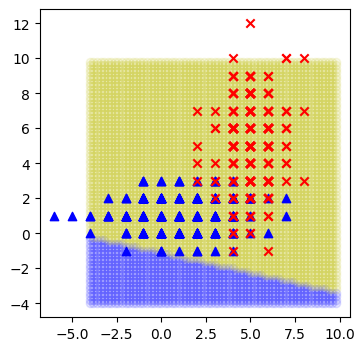

loss : 517.4197118597101


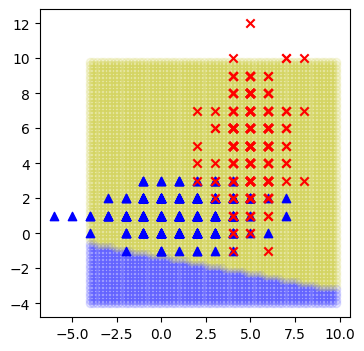

In [ ]:
demo_neuron = Neuron(2)
output = OutputLayer(2)

draw_neuron_boundary(demo_neuron, train_features, train_labels, markers, colors)

for train_iter_id in range(100):
    h = demo_neuron.forward(train_features)
    predicts, loss = output.forward(h, train_labels)

    dL_by_dH = output.backward()
    dL_by_dW = demo_neuron.backward(dL_by_dH)
    demo_neuron.update_parameters(dL_by_dW)

    if train_iter_id % 20 == 0:
        print('loss :', loss)
        draw_neuron_boundary(demo_neuron, train_features, train_labels, markers, colors)

In [ ]:
def draw_neuron_boundary_2(weights, bias, features, labels, markers, colors):
    # Define the grid of points
    grid_step = 0.2
    xx, yy = np.meshgrid(np.arange(-4, 10, grid_step), np.arange(-4, 10, grid_step))
    grid_points = np.c_[xx.ravel(), yy.ravel()].T

    # Predict
    #predict = neuron.predict(grid_points)
    X = grid_points
    m = X.shape[1]
    b = np.ones((1, m))
    x = np.concatenate((X, b), axis=0)

    # weights bias tensor
    nn_weights = weights.numpy()
    nn_bias = bias.numpy().reshape((1, 1))
    W = np.concatenate((nn_weights.T, nn_bias), axis=0)
    z = W.T.dot(x)
    predict = sigmod(z)

    # Create the scatter plot with decision boundary
    positive_index = np.where(predict[0,:] > 0.5)
    negative_index = np.where(predict[0,:] <= 0.5)

    plt.figure(figsize=(4, 4))
    plt.scatter(grid_points[0, positive_index], grid_points[1, positive_index], c='b', alpha=0.1)
    plt.scatter(grid_points[0, negative_index], grid_points[1, negative_index], c='y', alpha=0.1)

    for i in range(2):
        x = features[0, np.where(labels[i, :] == 1)]
        y = features[1, np.where(labels[i, :] == 1)]
        plt.scatter(x, y, marker=markers[i], c=colors[i])

    plt.show()

TorchNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=2, out_features=1, bias=True)
  (A): Sigmoid()
  (output): Linear(in_features=1, out_features=2, bias=True)
)
Epoch 1
-------------------------------
loss: 1.012725  [    1/  540]


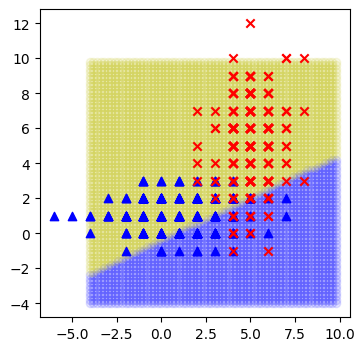

loss: 0.618951  [  101/  540]


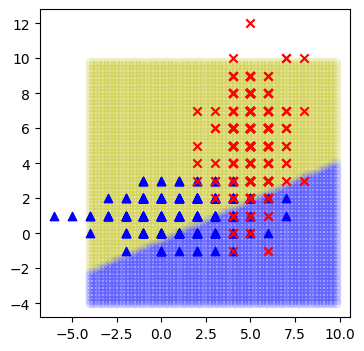

loss: 0.357184  [  201/  540]


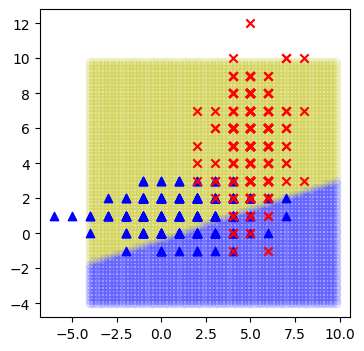

loss: 0.103837  [  301/  540]


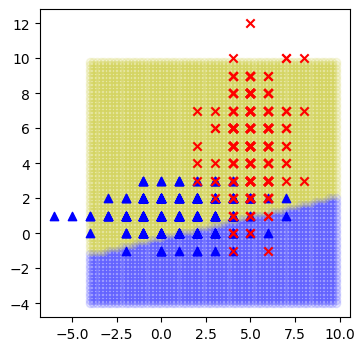

loss: 0.241283  [  401/  540]


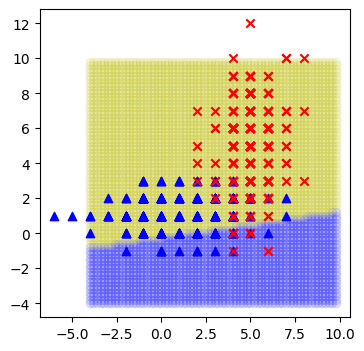

loss: 0.161876  [  501/  540]


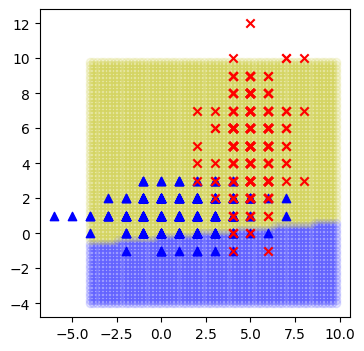

Test Error: 
 Accuracy: 100.0%, Avg loss: 0.184756 

Epoch 2
-------------------------------
loss: 0.139821  [    1/  540]


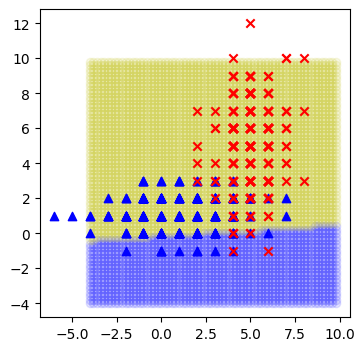

loss: 0.401083  [  101/  540]


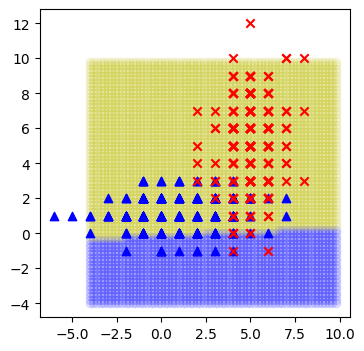

loss: 0.356714  [  201/  540]


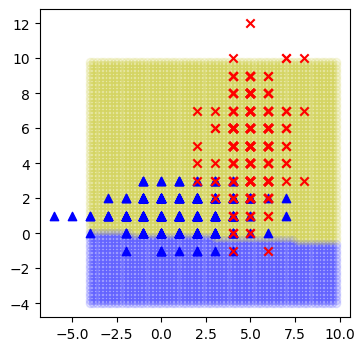

loss: 0.065469  [  301/  540]


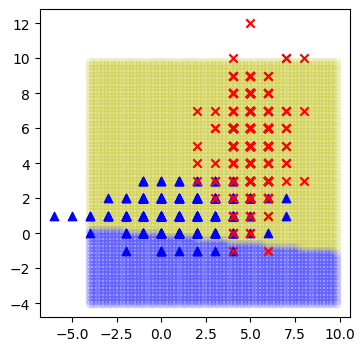

loss: 0.254853  [  401/  540]


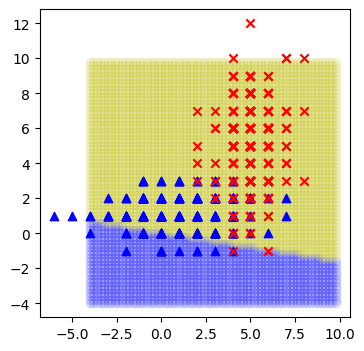

loss: 0.101718  [  501/  540]


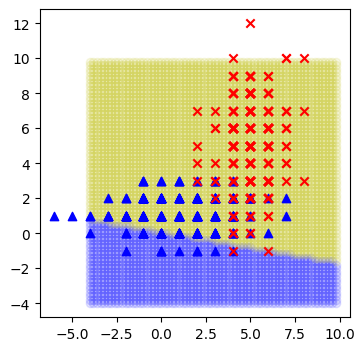

Test Error: 
 Accuracy: 100.0%, Avg loss: 0.141324 

Epoch 3
-------------------------------
loss: 0.112971  [    1/  540]


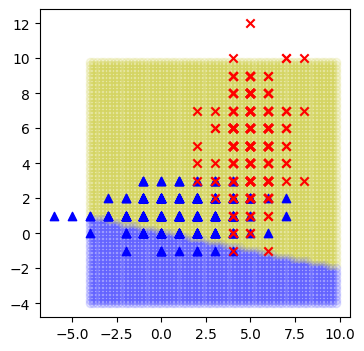

loss: 0.345996  [  101/  540]


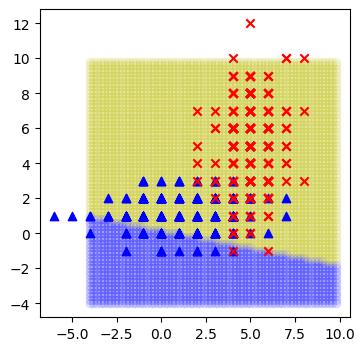

loss: 0.332104  [  201/  540]


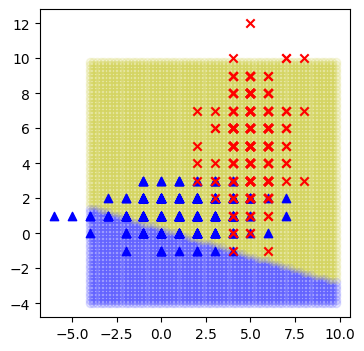

loss: 0.038720  [  301/  540]


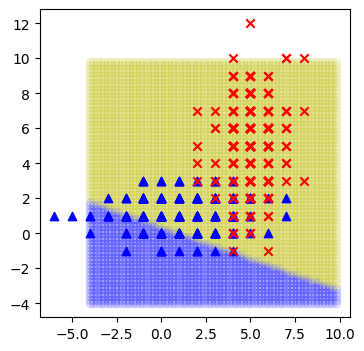

loss: 0.258752  [  401/  540]


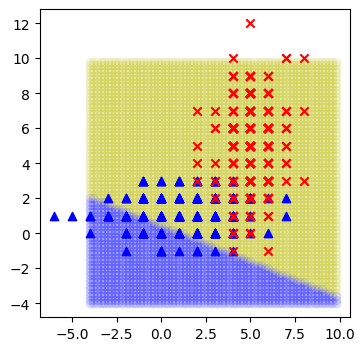

loss: 0.058996  [  501/  540]


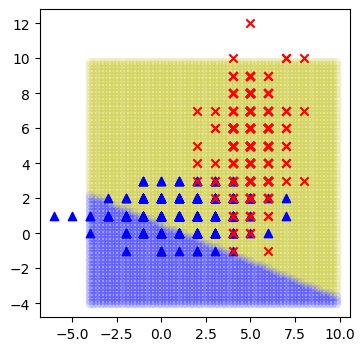

Test Error: 
 Accuracy: 100.0%, Avg loss: 0.103529 

Epoch 4
-------------------------------
loss: 0.076778  [    1/  540]


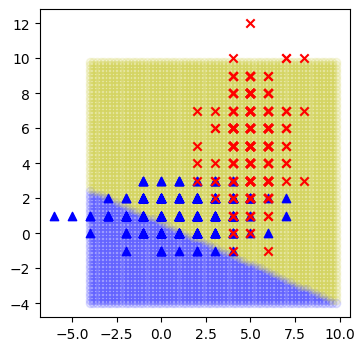

loss: 0.304650  [  101/  540]


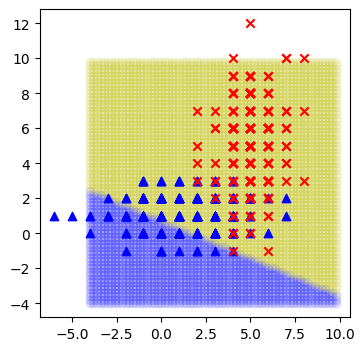

loss: 0.287321  [  201/  540]


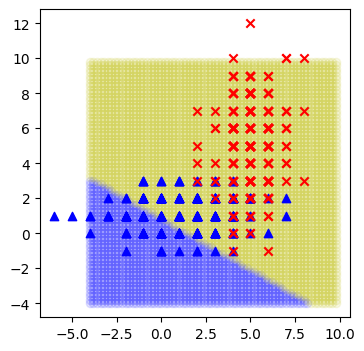

loss: 0.023603  [  301/  540]


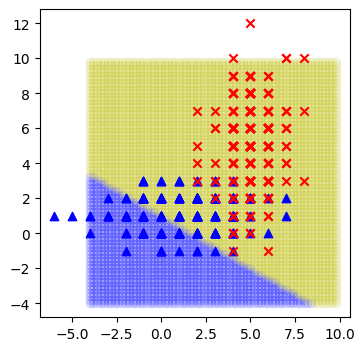

loss: 0.258995  [  401/  540]


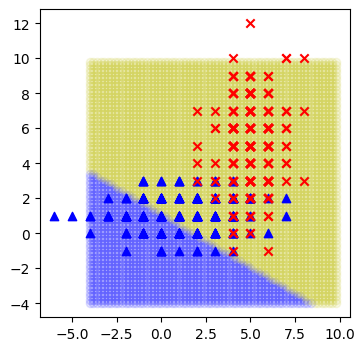

loss: 0.030664  [  501/  540]


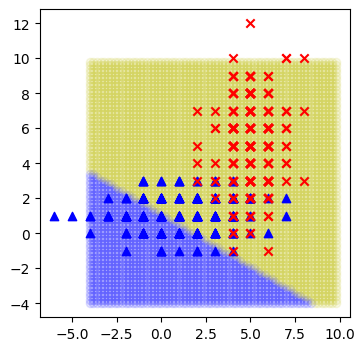

Test Error: 
 Accuracy: 100.0%, Avg loss: 0.076867 

Epoch 5
-------------------------------
loss: 0.044392  [    1/  540]


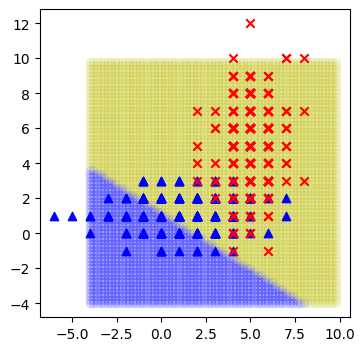

loss: 0.284081  [  101/  540]


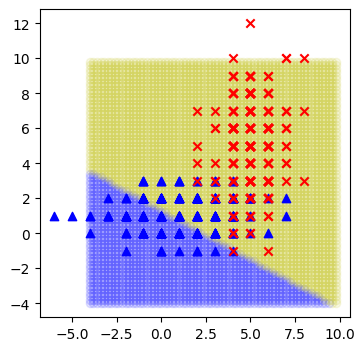

loss: 0.250540  [  201/  540]


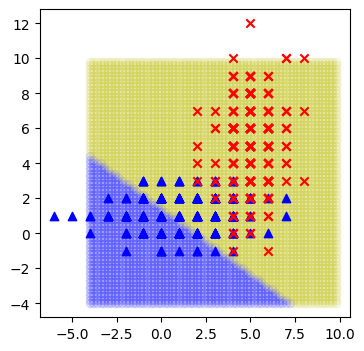

loss: 0.010945  [  301/  540]


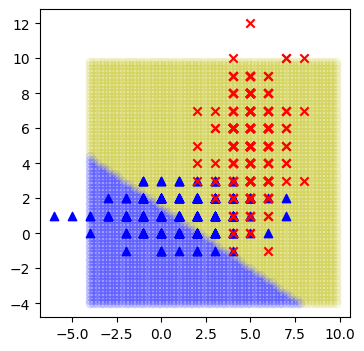

loss: 0.258445  [  401/  540]


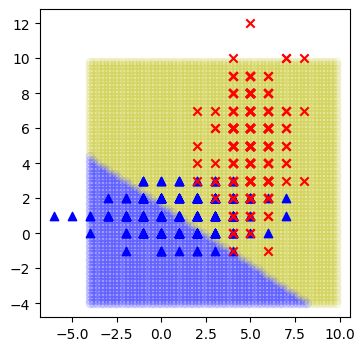

loss: 0.013392  [  501/  540]


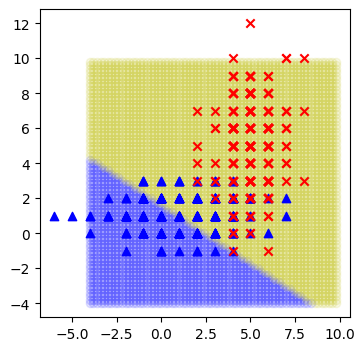

Test Error: 
 Accuracy: 100.0%, Avg loss: 0.060622 

Epoch 6
-------------------------------
loss: 0.022073  [    1/  540]


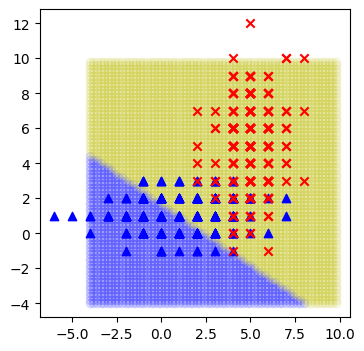

loss: 0.285840  [  101/  540]


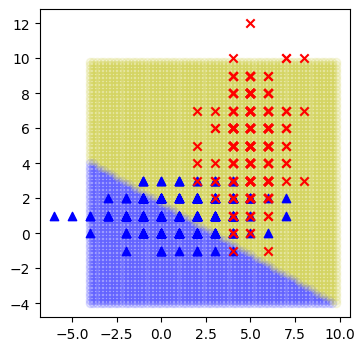

loss: 0.228043  [  201/  540]


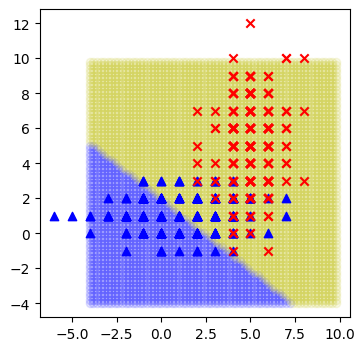

loss: 0.003349  [  301/  540]


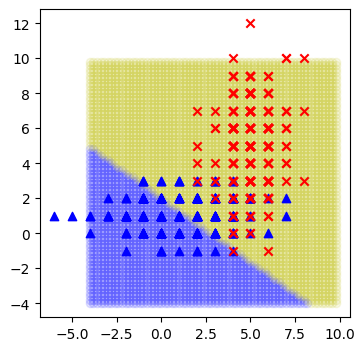

loss: 0.256991  [  401/  540]


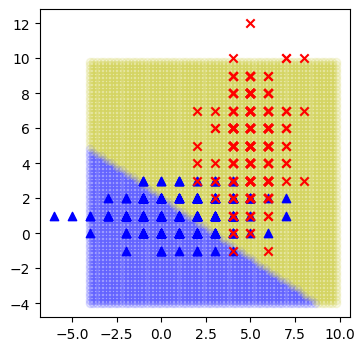

loss: 0.004887  [  501/  540]


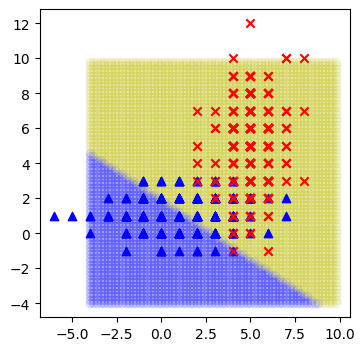

Test Error: 
 Accuracy: 100.0%, Avg loss: 0.051251 

Epoch 7
-------------------------------
loss: 0.009310  [    1/  540]


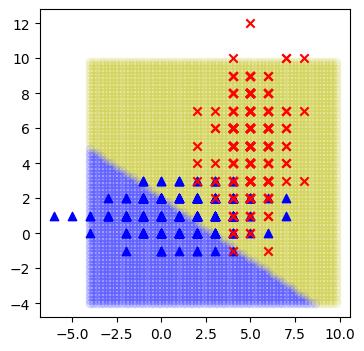

loss: 0.295042  [  101/  540]


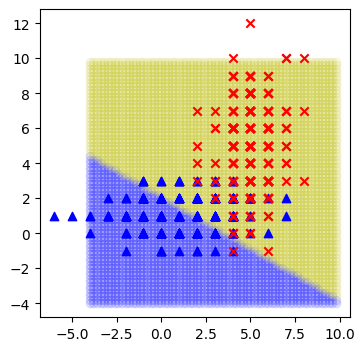

loss: 0.210915  [  201/  540]


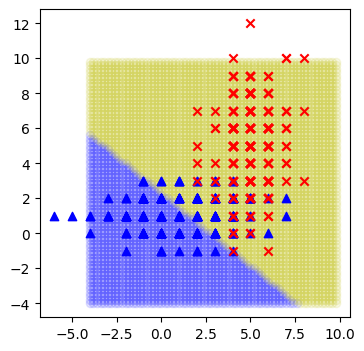

loss: 0.001034  [  301/  540]


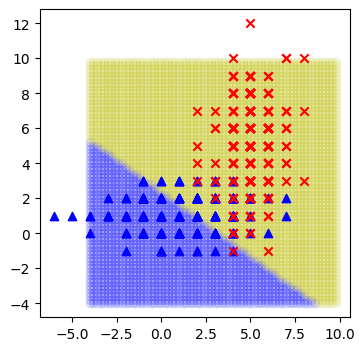

loss: 0.254539  [  401/  540]


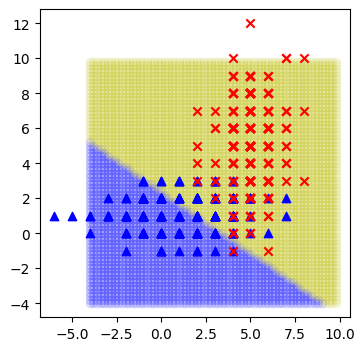

loss: 0.001544  [  501/  540]


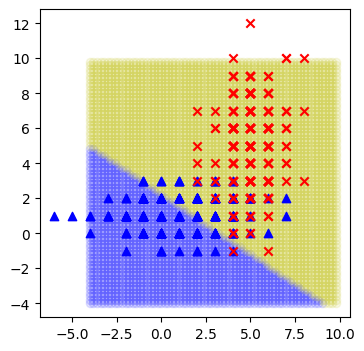

Test Error: 
 Accuracy: 100.0%, Avg loss: 0.045902 

Epoch 8
-------------------------------
loss: 0.003199  [    1/  540]


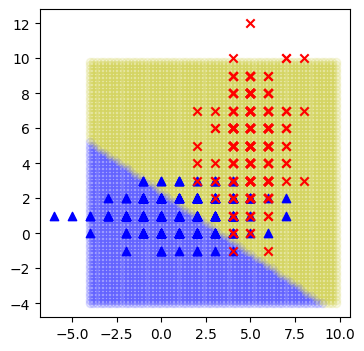

loss: 0.302689  [  101/  540]


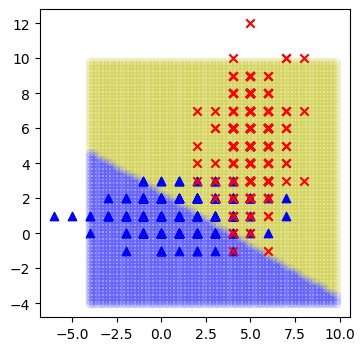

loss: 0.194972  [  201/  540]


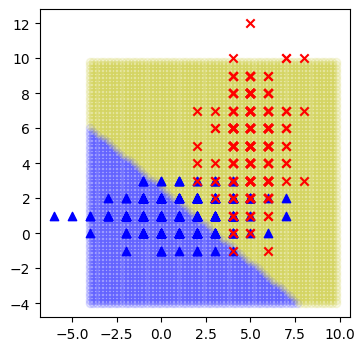

loss: 0.000971  [  301/  540]


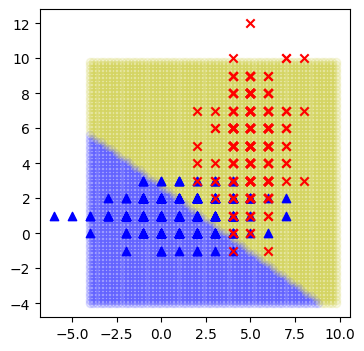

loss: 0.251190  [  401/  540]


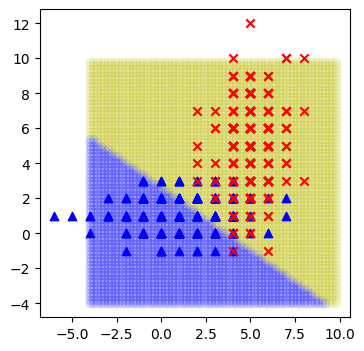

loss: 0.000489  [  501/  540]


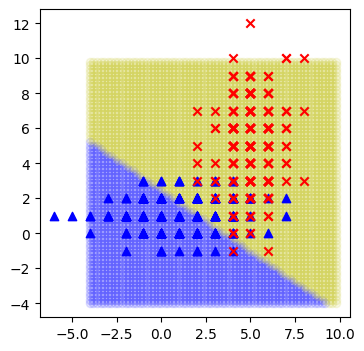

Test Error: 
 Accuracy: 100.0%, Avg loss: 0.042718 

Epoch 9
-------------------------------
loss: 0.000813  [    1/  540]


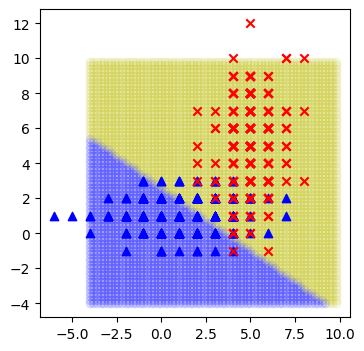

loss: 0.307128  [  101/  540]


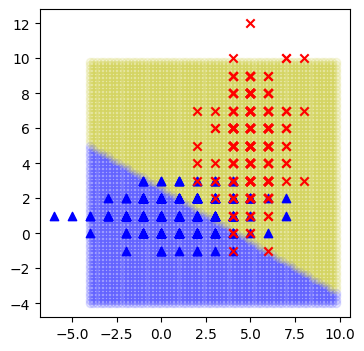

loss: 0.180177  [  201/  540]


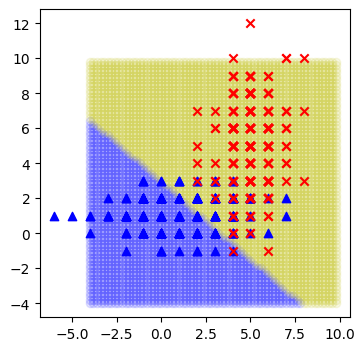

loss: 0.001316  [  301/  540]


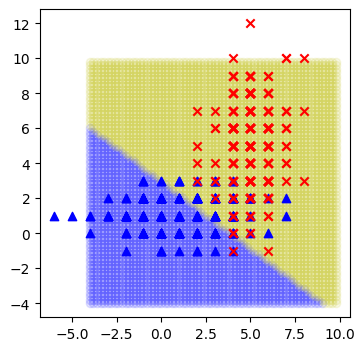

loss: 0.247386  [  401/  540]


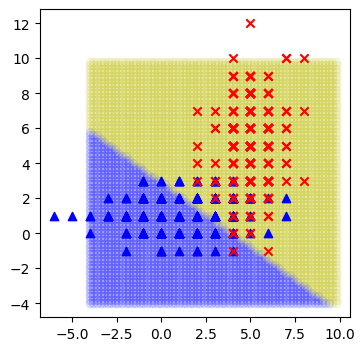

loss: 0.000257  [  501/  540]


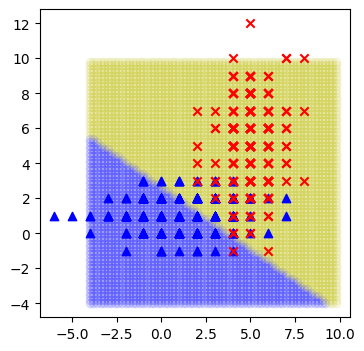

Test Error: 
 Accuracy: 100.0%, Avg loss: 0.040666 

Epoch 10
-------------------------------
loss: 0.000209  [    1/  540]


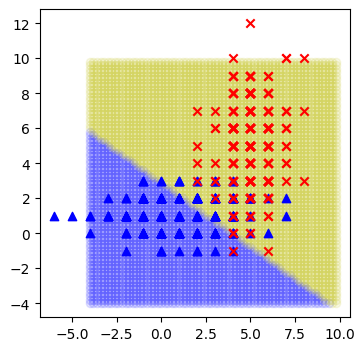

loss: 0.309072  [  101/  540]


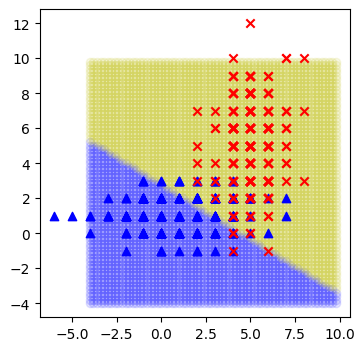

loss: 0.167168  [  201/  540]


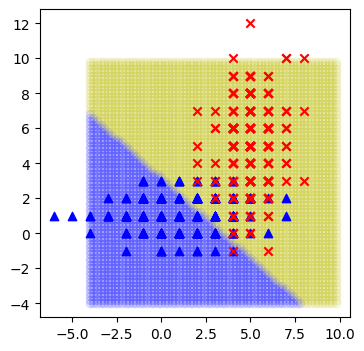

loss: 0.001537  [  301/  540]


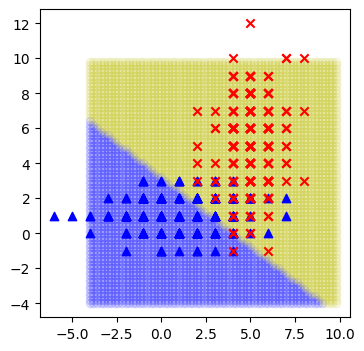

loss: 0.243537  [  401/  540]


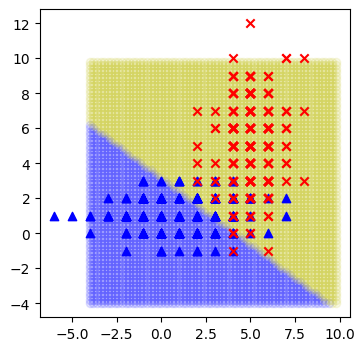

loss: 0.000272  [  501/  540]


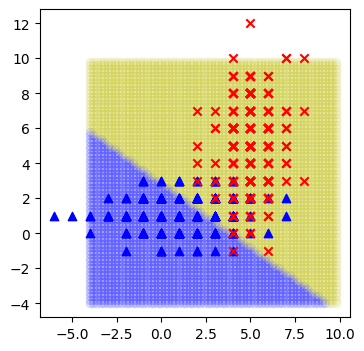

Test Error: 
 Accuracy: 100.0%, Avg loss: 0.039225 

Done!


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

train_X = torch.Tensor(train_features.T) # transform to torch tensor
train_y = torch.Tensor(train_labels.T)
#print('train_X ', train_X.shape)
#print('train_y ', train_y.shape)
train_dataset = TensorDataset(train_X, train_y)
train_dataloader = DataLoader(train_dataset)
#print('train_dl ', type(train_dataloader.dataset))
#print('train_dl ', len(train_dataloader.dataset))

test_X = torch.Tensor(test_features.T) # transform to torch tensor
test_y = torch.Tensor(test_labels.T)
test_dataset = TensorDataset(test_X, test_y)
test_dataloader = DataLoader(test_dataset)

# Learn to use pytorch to build the same nn to compare with the self-implement NN

class TorchNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features = 2, out_features = 1, bias = True)
        self.A = nn.Sigmoid()
        self.output = nn.Linear(in_features = 1, out_features = 2, bias = True)
    
    def forward(self, x):
        #print('nn forward, x shape:', x.shape)
        x = self.flatten(x)
        logits = self.output(self.A(self.fc1(x)))

        #print('nn forward, after flatten x shape:', x.shape)
        return logits
    
    def show_weights(self):
        #print(self.fc1.weight.data, self.fc1.bias.data,  self.output.weight.data, self.output.bias.data)
        return

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            draw_neuron_boundary_2(model.fc1.weight.data, model.fc1.bias.data, train_features, train_labels, markers, colors)
            #model.show_weights()

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


tNN = TorchNN()
print(tNN)

loss_function = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(tNN.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, tNN, loss_function, optimizer)
    #tNN.show_weights()
    test_loop(test_dataloader, tNN, loss_function)
print("Done!")


